On processing....

## Task 1

Make use of Logistic Regression model from scikit-learn or some other packages in Python, run
the Sentiment Analysis solution again and make a very thorough comparison with what we
implemented from scratch.

In [38]:
import nltk #Natural Language Toolkit
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Twitter sample data**

In [39]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Problem

We are in a typical framework for Sentiment Analysis where we would love to create some sort of algorithm to determine whether the sentiment of a sentence (a tweet in this case) is positive or negative. 

In [85]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [87]:
# split data into train and test set
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [88]:
# Create the numpy array of positive labels and negative labels.
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [89]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [90]:
print('the tweet in train set is: ', train_x[108])

the tweet in train set is:  @UKBusinessLunch Hi we will be joining you again today :)


In [91]:
print('the 1001-th tweet in test set: ', test_x[1450])

the 1001-th tweet in test set:  someone say thank u and goodbye to chris for me tomorrow pls :(


## I - Data Preprocessing

Output: each tweet is transformed into a list of "words" (they are not 100% usual English words because of stemming operation).


In [92]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re
import string

def process_tweet(tweet):
    """
    Input:
        :tweet: a string
    Output:
        :tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True) #the tokenizer will downcase everything except for emoticons
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and   # remove stopwords
                word not in string.punctuation): # remove punctuation
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)

    return tweets_clean

In [93]:
print(train_x[6])
print(process_tweet(train_x[6]))

We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI
['like', 'keep', 'love', 'custom', 'wait', 'long', 'hope', 'enjoy', 'happi', 'friday', 'lwwf', ':)']


In [94]:
print(test_x[11])
print(process_tweet(test_x[11]))

@EllieVond @SkeletonSweets @Justin_Naito @justcallmerizzo No actually, you don't. Bye bye indeed. Go take your drama elsewhere. :)
['actual', 'bye', 'bye', 'inde', 'go', 'take', 'drama', 'elsewher', ':)']


## II.1 - Feature Engineering

In [95]:
def build_freqs(tweets, ys):
    """ Build frequencies
    Input:
    tweets: a list of tweets
    ys: an mx1 array with the sentiment label of each tweet (either 0 or 1)
    Output:
    freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    yslist = np.squeeze(ys).tolist()
    # start with an empty dict and populate it by looping over all tweets
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [96]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11397


In [97]:
freqs

{('followfriday', 1.0): 23,
 ('top', 1.0): 30,
 ('engag', 1.0): 7,
 ('member', 1.0): 14,
 ('commun', 1.0): 27,
 ('week', 1.0): 72,
 (':)', 1.0): 2960,
 ('hey', 1.0): 60,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 81,
 ('call', 1.0): 27,
 ('contact', 1.0): 4,
 ('centr', 1.0): 1,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 6,
 ('assist', 1.0): 1,
 ('mani', 1.0): 28,
 ('thank', 1.0): 522,
 ('listen', 1.0): 15,
 ('last', 1.0): 39,
 ('night', 1.0): 55,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 41,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 15,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 57,
 ('blue', 1.0): 8,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 4,
 ('profil', 1.0): 2,
 ('15', 1.0): 4,
 ('day', 1.0): 187,
 ('one', 1.0): 92,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 16,
 ('like', 1.0): 187,
 ('keep', 1.0): 55,
 ('love', 1.0): 336,
 

## II.2 - Feature extraction

In [98]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        if (word, 1) in freqs.keys():
            x[0,1] += freqs[(word, 1)]
        
        # increment the word count for the negative label 0
        if (word, 0) in freqs.keys():
            x[0,2] += freqs[(word, 0)]
        
    assert(x.shape == (1, 3))
    return x

In [99]:
train_x[8]

'Jgh , but we have to go to Bayan :D bye'

In [100]:
extract_features(train_x[8], freqs)

array([[  1., 656., 189.]])

In [101]:
process_tweet(train_x[8])

['jgh', 'go', 'bayan', ':d', 'bye']

## Part III - Logistic regression 

In [102]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    ''' 
    h = 1. / (1. + np.exp(-z))
    return h

In [104]:
import matplotlib.pyplot as plt

def gradient_descent_logistic(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix X
    m = len(x)
    losses = []
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = - (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) / float(m)
        losses.append(float(J))
        # update the weights theta
        theta = theta - (alpha * np.dot(x.T, (h-y))) / float(m)
    
    J = float(J)
    
    # plot the loss function
    iter_list = np.arange(1, num_iters + 1, 1)
    plt.plot(iter_list, losses, color='green', label='loss')
    plt.xlabel('number of iterations')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    return J, theta

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17780\3353328855.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(J))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17780\3353328855.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


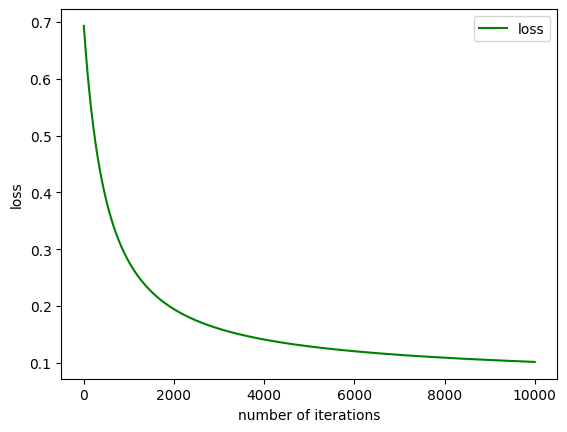

The cost after training is 0.10157921.
The resulting vector of weights is [3e-07, 0.00127323, -0.001111]


In [105]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, w = gradient_descent_logistic(X, Y, np.zeros((3, 1)), 1e-9, 10000)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(w)]}")

In [106]:
# Save the weights (a numpy array) in a binary .npy format.
np.save("sentiment_analysis_logistic_weights.npy",w)

In [107]:
w = np.load("sentiment_analysis_logistic_weights.npy")
w 

array([[ 3.03801795e-07],
       [ 1.27323059e-03],
       [-1.11100055e-03]])

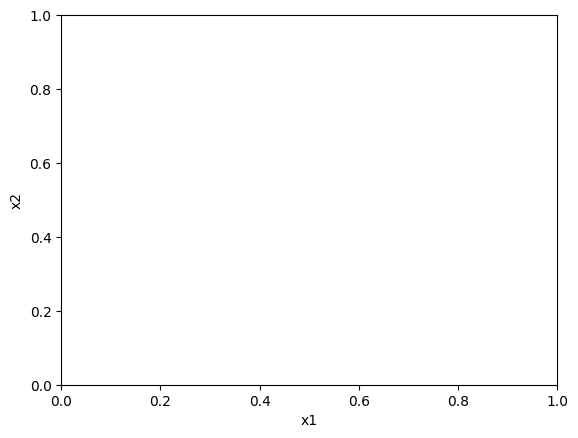

In [108]:
# Plot the decision boundary
x1 = np.arange(0, 10000, 10)
x2 = np.arange(0, 10000, 10)

x1, x2 = np.meshgrid(x1, x2)
params = np.squeeze(w)
g = params[0] + params[1] * x1 + params[2] * x2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, x2, g)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [109]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''

    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred

In [110]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, w)))    

I am happy -> 0.546432
I am bad -> 0.489459
this movie should have been great. -> 0.539413
great -> 0.538728
great great -> 0.576993
great great great -> 0.614357
great great great great -> 0.650420


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17780\3490015410.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, w)))


In [111]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am so hot'
predict_tweet(my_tweet, freqs, w)

array([[0.5038664]])

#### Determine the model precision 
* Use your 'predict_tweet' function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification 'y_hat' to 1, otherwise set the model's classification 'y_hat' to 0. 0.5 plays a role of the decision threshold here.
* A prediction is accurate when the y_hat equals the test_y.  Sum up all the instances when they are equal and divide by $n$.


In [112]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """   
    # the list for storing predictions
    y_hat = list()
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = np.sum(y_hat == np.squeeze(test_y)) / len(test_y)    
    return accuracy

In [113]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, w)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9960


### Error Analysis

In [114]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, w)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @msarosh Uff Itna Miss karhy thy ap :p
THE PROCESSED TWEET IS: ['uff', 'itna', 'miss', 'karhi', 'thi', 'ap', ':p']
1	0.47137167	b'uff itna miss karhi thi ap :p'


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17780\2367174779.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))


THE TWEET IS: @phenomyoutube u probs had more fun with david than me : (
THE PROCESSED TWEET IS: ['u', 'prob', 'fun', 'david']
0	0.53251630	b'u prob fun david'
THE TWEET IS: pats jay : (
THE PROCESSED TWEET IS: ['pat', 'jay']
0	0.50095500	b'pat jay'
THE TWEET IS: @bae_ts WHATEVER STIL L YOUNG &gt;:-(
THE PROCESSED TWEET IS: ['whatev', 'stil', 'l', 'young', '>:-(']
0	0.50032454	b'whatev stil l young >:-('
THE TWEET IS: my beloved grandmother : ( https://t.co/wt4oXq5xCf
THE PROCESSED TWEET IS: ['belov', 'grandmoth']
0	0.50000008	b'belov grandmoth'
THE TWEET IS: @CHEDA_KHAN Thats life. I get calls from people I havent seen in 20 years and its always favours : (
THE PROCESSED TWEET IS: ['that', 'life', 'get', 'call', 'peopl', 'havent', 'seen', '20', 'year', 'alway', 'favour']
0	0.50564988	b'that life get call peopl havent seen 20 year alway favour'
THE TWEET IS: Sr. Financial Analyst - Expedia, Inc.: (#Bellevue, WA) http://t.co/ktknMhvwCI #Finance #ExpediaJobs #Job #Jobs #Hiring
THE PROCES

In [116]:
# Test results
my_tweet = 'Hopefully my very first NLP session is not too boring to you " !!!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, w)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['hope', 'first', 'nlp', 'session', 'bore']
[[0.51525702]]
Positive sentiment


## Test with LinearRegression from sklearn

Scikit-learn abstracts away all the complex mathematics internally. The user does not need to worry about implementing the Sigmoid function, cost function, or Gradient Descent.

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

ValueError: could not convert string to float: '#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

### A Detailed Comparison of the Two Methods

...

## Task 2:

In this line of code, if we change the number of iterations to, say, 100K, you might get some
“divided by zero” error. Explain why and find a correction.
gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 10000)

Nguyên nhân:
Khi tăng số iterations lên 100,000, thuật toán gradient descent có thể hội tụ đến giá trị tối ưu và sigmoid function trả về giá trị rất gần 0 hoặc 1. Khi tính np.log(h) hoặc np.log(1-h), nếu h = 0 hoặc h = 1, ta sẽ gặp lỗi log(0).

Giải pháp:
Thêm epsilon nhỏ để tránh log(0):

In [119]:
def fixed_gradient_descent_logistic(x, y, theta, alpha, num_iters):
    m = len(x)
    losses = []
    eps = 1e-7  # Epsilon nhỏ để tránh log(0)
    
    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        
        # Clamp h để tránh log(0)
        h = np.clip(h, eps, 1 - eps)
        
        # Tính cost function với epsilon
        J = -(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) / float(m)
        losses.append(float(J))
        
        # Update weights
        theta = theta - (alpha * np.dot(x.T, (h-y))) / float(m)

    J = float(J)
    
    # Plot loss
    iter_list = np.arange(1, num_iters + 1, 1)
    plt.plot(iter_list, losses, color='green', label='loss')
    plt.xlabel('number of iterations')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    return J, theta

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17780\3334272438.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(float(J))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17780\3334272438.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


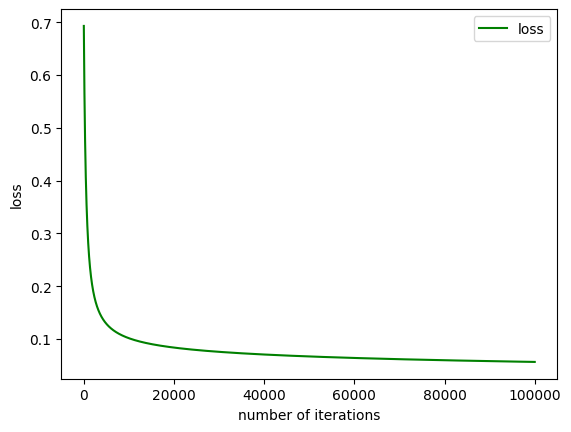

The cost after training is 0.05666520.
The resulting vector of weights is [1.17e-06, 0.00280679, -0.00210874]


In [120]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, w = fixed_gradient_descent_logistic(X, Y, np.zeros((3, 1)), 1e-9, 100000)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(w)]}")